# News Headline Modeling

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
from nltk.corpus import stopwords, wordnet
from imblearn.pipeline import Pipeline as ImPipeline
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, plot_confusion_matrix
import string
import re
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df = pd.read_csv('../data/labeled_newscatcher_dataset.csv', sep=";")
#corpus = pd.read_csv('/content/drive/MyDrive/labeled_newscatcher_dataset.csv', sep=";")
df.head()

,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en


In [14]:
df2 = pd.read_csv('../data/scrape_news_articles.csv', sep=";", index_col=[0])
#df2 = pd.read_csv('/content/drive/MyDrive/scrape_news_articles.csv', sep=";")
df2.head()

,topic,link,domain,published_date,title,lang
0,BEAUTY,https://www.politico.com/newsletters/politico-...,politico.com,2022-03-08 15:45:00,Moderna eases up on vaccine patent protections,en
1,BEAUTY,https://stylecaster.com/queen-elizabeth-lilibet,stylecaster.com,2022-03-08 15:10:14,The Queen ‘Desperately' Wants to Meet Lilibet—...,en
2,BEAUTY,https://stylecaster.com/kim-kardashian-kanye-p...,stylecaster.com,2022-03-08 14:45:04,Here's What Kim Really Thinks of Kanye's ‘Dist...,en
3,BEAUTY,https://www.complex.com/style/novesta-ss22,complex.com,2022-03-08 14:44:22,Novesta Unveils Colourful Spring/Summer 2022 F...,en
4,BEAUTY,https://www.qatarliving.com/forum/fashion/ladi...,qatarliving.com,2022-03-08 13:50:35,Ladies! Dress up with the Perfect Dresses from...,en


In [15]:
corpus = pd.concat([df, df2], ignore_index=True)
corpus.head()

,topic,link,domain,published_date,title,lang
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en


## Vectorization and Modeling

In [5]:
X = corpus.title
y = corpus.topic

In [6]:
# performing a train-test split first
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=549841, test_size=0.35)

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\deaud\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
sw = stopwords.words('english')

### CountVectorizer

In [13]:
count_dummy = Pipeline(steps=([("vectorize", CountVectorizer(stop_words= sw)), 
                            ("dc", DummyClassifier())]))

parameters = {}

count_dc = GridSearchCV(estimator= count_dummy,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

count_dc.fit(X_train, y_train)

print(f'This is the training score: {count_dc.score(X_train, y_train)}')
print(f'This is the testing score: {count_dc.score(X_test, y_test)}')
print(f'Best parameters: {count_dc.best_params_}')

This is the training score: 0.1340254303212028
This is the testing score: 0.132436762890389
Best parameters: {}


In [14]:
count_mnb = Pipeline(steps=([("vectorize", CountVectorizer(stop_words= sw)), 
                            ("mnb", MultinomialNB())]))

parameters = {}

count_gs = GridSearchCV(estimator= count_mnb,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

count_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [15]:
print(f'This is the training score: {count_gs.score(X_train, y_train)}')
print(f'This is the testing score: {count_gs.score(X_test, y_test)}')
print(f'Best parameters: {count_gs.best_params_}')

This is the training score: 0.8500063646521364
This is the testing score: 0.7919413726983794
Best parameters: {}


In [9]:
count_mnb = Pipeline(steps=([("vectorize", CountVectorizer(stop_words= sw)), 
                            ("mnb", MultinomialNB())]))

parameters = {'mnb__alpha': np.linspace(0, 1.0, 5)}

count_gs = GridSearchCV(estimator= count_mnb,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

count_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [10]:
print(f'This is the training score: {count_gs.score(X_train, y_train)}')
print(f'This is the testing score: {count_gs.score(X_test, y_test)}')
print(f'Best parameters: {count_gs.best_params_}')

This is the training score: 0.8780108340523033
This is the testing score: 0.8008720548448951
Best parameters: {'mnb__alpha': 0.25}


In [13]:
import pickle

pickle.dump(count_gs, open('../models/mnb_model.pkl', 'wb'))

In [16]:
loaded_model = pickle.load(open('../models/mnb_model.pkl', 'rb'))
loaded_model

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [14]:
test = ["NBA star's monster triple-double lifts Nuggets to overtime win"]
loaded_model.predict(test)

array(['SPORTS'], dtype='<U13')

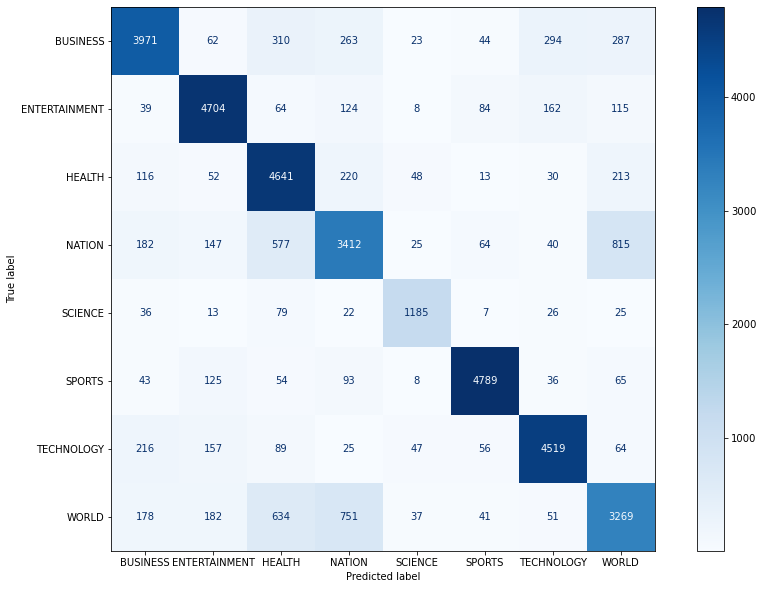

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
plot_confusion_matrix(count_gs, X_test, y_test, ax=ax, cmap=plt.cm.Blues);

In [34]:
y_hat = count_gs.predict(X_test)

In [36]:
precision_score(y_test, y_hat, average='weighted')

0.8018967667805358

In [44]:
print(f'This is the accuracy score: {accuracy_score(y_test, y_hat)}')
print(f"This is the recall score: {recall_score(y_test, y_hat, average='macro')}")
print(f"This is the precision score: {precision_score(y_test, y_hat, average='macro')}")

This is the accuracy score: 0.8008720548448951
This is the recall score: 0.8050699040476345
This is the precision score: 0.8071018085540007


In [ ]:
count_forest = Pipeline(steps=([("vectorize", CountVectorizer(stop_words= sw)), 
                                ("rf", RandomForestClassifier())]))

parameters = {'rf__class_weight': ['balanced', 'balanced_subsample']}

count_rf = GridSearchCV(estimator= count_forest,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

count_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [ ]:
print(f'This is the training score: {count_rf.score(X_train, y_train)}')
print(f'This is the testing score: {count_rf.score(X_test, y_test)}')
print(f'Best parameters: {count_rf.best_params_}')

This is the training score: 0.995926622632703
This is the testing score: 0.7526726379659058
Best parameters: {'rf__class_weight': 'balanced'}


In [ ]:
count_forest = Pipeline(steps=([("vectorize", CountVectorizer(stop_words= sw)), 
                                ("rf", RandomForestClassifier(class_weight='balanced'))]))

parameters = {'rf__min_samples_leaf': [2, 10, 30, 100]}

count_rf2 = GridSearchCV(estimator= count_forest,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

count_rf2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [ ]:
print(f'This is the training score: {count_rf2.score(X_train, y_train)}')
print(f'This is the testing score: {count_rf2.score(X_test, y_test)}')
print(f'Best parameters: {count_rf2.best_params_}')

This is the training score: 0.7704199256042884
This is the testing score: 0.7135615035066061
Best parameters: {'rf__min_samples_leaf': 2}


In [ ]:
count_forest = Pipeline(steps=([("vectorize", CountVectorizer(stop_words= sw)), 
                                ("rf", RandomForestClassifier(class_weight='balanced', min_samples_leaf=2))]))

parameters = {'rf__min_samples_split': [2, 10, 20]}

count_rf3 = GridSearchCV(estimator= count_forest,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

count_rf3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [ ]:
print(f'This is the training score: {count_rf3.score(X_train, y_train)}')
print(f'This is the testing score: {count_rf3.score(X_test, y_test)}')
print(f'Best parameters: {count_rf3.best_params_}')

This is the training score: 0.7699956154618616
This is the testing score: 0.713141236111476
Best parameters: {'rf__min_samples_split': 2}


In [ ]:
count_forest = Pipeline(steps=([("vectorize", CountVectorizer(stop_words= sw)), 
                                ("rf", RandomForestClassifier(class_weight='balanced', min_samples_leaf=2))]))

parameters = {'rf__n_estimators': [50, 100, 150]}

count_rf4 = GridSearchCV(estimator= count_forest,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

count_rf4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        CountVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [ ]:
print(f'This is the training score: {count_rf4.score(X_train, y_train)}')
print(f'This is the testing score: {count_rf4.score(X_test, y_test)}')
print(f'Best parameters: {count_rf4.best_params_}')

This is the training score: 0.7699248971047905
This is the testing score: 0.713141236111476
Best parameters: {'rf__n_estimators': 150}


### TF-IDF Vectorizer

In [ ]:
tfidf_mnb = Pipeline(steps=([("vectorize", TfidfVectorizer(stop_words= sw)),
                            ("mnb", MultinomialNB())]))

parameters = {'mnb__alpha': np.linspace(0, 1.0, 5)}

tfidf_gs = GridSearchCV(estimator= tfidf_mnb,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

tfidf_gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [ ]:
print(f'This is the training score: {tfidf_gs.score(X_train, y_train)}')
print(f'This is the testing score: {tfidf_gs.score(X_test, y_test)}')
print(f'Best parameters: {tfidf_gs.best_params_}')

This is the training score: 0.8851675317879015
This is the testing score: 0.8019752567571117
Best parameters: {'mnb__alpha': 0.25}


In [ ]:
tfidf_forest = Pipeline(steps=([("vectorize", TfidfVectorizer(stop_words= sw)), 
                                ("rf", RandomForestClassifier(class_weight='balanced'))]))

parameters = {'rf__min_samples_leaf': [2, 3, 4, 5]}

tfidf_rf = GridSearchCV(estimator= tfidf_forest,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

tfidf_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [ ]:
print(f'This is the training score: {tfidf_rf.score(X_train, y_train)}')
print(f'This is the testing score: {tfidf_rf.score(X_test, y_test)}')
print(f'Best parameters: {tfidf_rf.best_params_}')

This is the training score: 0.7882409515862128
This is the testing score: 0.7120380341992593
Best parameters: {'rf__min_samples_leaf': 2}


In [ ]:
tfidf_forest = Pipeline(steps=([("vectorize", TfidfVectorizer(stop_words= sw)), 
                                ("rf", RandomForestClassifier(class_weight='balanced', min_samples_leaf=2))]))

parameters = {'rf__min_samples_split': [2, 5, 10]}

tfidf_rf2 = GridSearchCV(estimator= tfidf_forest,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

tfidf_rf2.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [ ]:
print(f'This is the training score: {tfidf_rf2.score(X_train, y_train)}')
print(f'This is the testing score: {tfidf_rf2.score(X_test, y_test)}')
print(f'Best parameters: {tfidf_rf2.best_params_}')

This is the training score: 0.7880570838578278
This is the testing score: 0.7129311024139109
Best parameters: {'rf__min_samples_split': 5}


In [ ]:
tfidf_forest = Pipeline(steps=([("vectorize", TfidfVectorizer(stop_words= sw)), 
                                ("rf", RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                                                              min_samples_split=5))]))

parameters = {'rf__n_estimators': [350, 400, 450]}

tfidf_rf3 = GridSearchCV(estimator= tfidf_forest,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

tfidf_rf3.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [ ]:
print(f'This is the training score: {tfidf_rf3.score(X_train, y_train)}')
print(f'This is the testing score: {tfidf_rf3.score(X_test, y_test)}')
print(f'Best parameters: {tfidf_rf3.best_params_}')

This is the training score: 0.7901927782413759
This is the testing score: 0.7135352367944104
Best parameters: {'rf__n_estimators': 350}


In [ ]:
tfidf_forest = Pipeline(steps=([("vectorize", TfidfVectorizer(stop_words= sw)), 
                                ("rf", RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                                                              min_samples_split=5, n_estimators= 350))]))

parameters = {'rf__max_depth': [400, 450, 500]}

tfidf_rf4 = GridSearchCV(estimator= tfidf_forest,
                 param_grid= parameters,
                 cv=5, error_score= 'raise')

tfidf_rf4.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('vectorize',
                                        TfidfVectorizer(stop_words=['i', 'me',
                                                                    'my',
                                                                    'myself',
                                                                    'we', 'our',
                                                                    'ours',
                                                                    'ourselves',
                                                                    'you',
                                                                    "you're",
                                                                    "you've",
                                                                    "you'll",
                                                                    "you'd",
                                                    

In [ ]:
print(f'This is the training score: {tfidf_rf4.score(X_train, y_train)}')
print(f'This is the testing score: {tfidf_rf4.score(X_test, y_test)}')
print(f'Best parameters: {tfidf_rf4.best_params_}')

This is the training score: 0.7208039262831846
This is the testing score: 0.6876887919939061
Best parameters: {'rf__max_depth': 500}
